In [2]:
!pip install opencv-python
!pip install mahotas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import data, color
from skimage.filters import threshold_otsu
import mahotas
import argparse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Functions used

In [3]:
def display_img(image,title='Image',x_label=None,y_label=None,cmap_type='gray',show_axis=False,colorBar=False,F_size=(8,6)):
  plt.figure(figsize=F_size)
  plt.imshow(image,cmap=cmap_type)
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  if colorBar: plt.colorbar()
  if not show_axis: plt.axis('off')
  plt.show()


#Loading the image

The following images will be examples to test the algorithms and pipelines. Be aware of these variable names, their respective images, and blurred and gray versions.

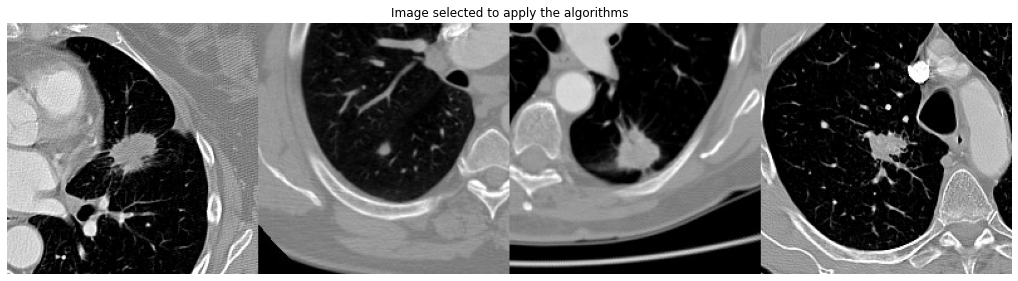

In [15]:
file_name = "maligno.jpg"

tumor_picture = plt.imread("maligno.jpg")

tumor_picture_gray = cv2.cvtColor(tumor_picture, cv2.COLOR_BGR2GRAY)  
tumor_picture_gray_blur = cv2.GaussianBlur(tumor_picture_gray, (21, 21), 0)

tumor_picture_2 = plt.imread("maligno2.jpg")

tumor_picture_2_gray = cv2.cvtColor(tumor_picture_2, cv2.COLOR_BGR2GRAY)  
tumor_picture_2_gray_blur = cv2.GaussianBlur(tumor_picture_2_gray, (21, 21), 0)

tumor_picture_3 = plt.imread("maligno3.jpg")

tumor_picture_3_gray = cv2.cvtColor(tumor_picture, cv2.COLOR_BGR2GRAY)  
tumor_picture_3_gray_blur = cv2.GaussianBlur(tumor_picture_3_gray, (21, 21), 0)

tumor_picture_4 = plt.imread("maligno4.jpg")

tumor_picture_4_gray = cv2.cvtColor(tumor_picture, cv2.COLOR_BGR2GRAY)  
tumor_picture_4_gray_blur = cv2.GaussianBlur(tumor_picture_4_gray, (21, 21), 0)
 
all_images = np.hstack([ np.hstack([tumor_picture,tumor_picture_2]), np.hstack([tumor_picture_3,tumor_picture_4]) ])
display_img(all_images,F_size=(18,15),title='Image selected to apply the algorithms')

##Threshold by using Otsu and Riddler-Calvard


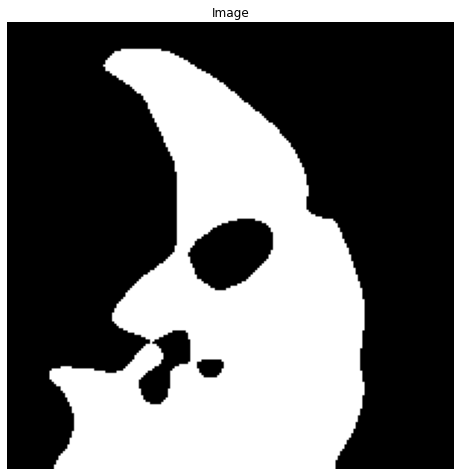

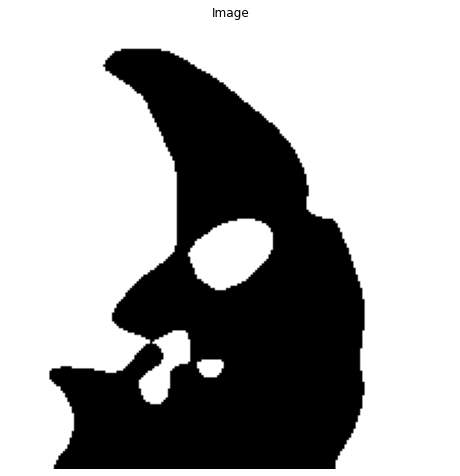

In [33]:

#tumor_picture_gray_blur = cv2.GaussianBlur(tumor_picture_gray, (21, 21), 0)

T = mahotas.thresholding.rc(tumor_picture_gray_blur)
temp = tumor_picture_gray_blur.copy() 
temp[temp > T] = 255 
temp[temp < 255] = 0 
temp = cv2.bitwise_not(temp) 
display_img(temp,F_size=(8,10))

T = mahotas.thresholding.otsu(tumor_picture_gray_blur)
temp2 = tumor_picture_gray_blur.copy() 
temp2[temp2 > T] = 255 
temp2[temp2 < 255] = 0 
temp2 = cv2.bitwise_not(temp) 
display_img(temp2,F_size=(8,10))

#result = np.vstack([tem2,temp3])


# Fixed threshold + Sobel

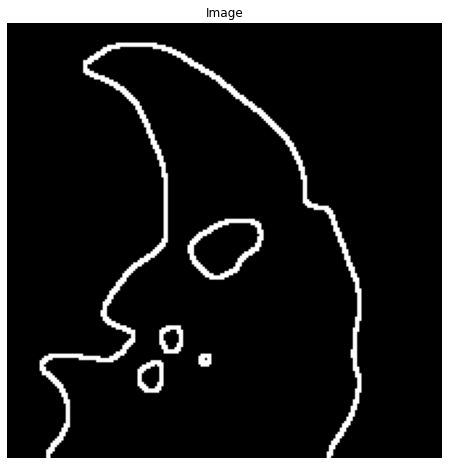

In [29]:
threshold = 120

tumor_picture_gray_threshold_blur = cv2.threshold(tumor_picture_gray_blur, threshold, 255, cv2.THRESH_BINARY_INV)[1]

sobelX = cv2.Sobel(tumor_picture_gray_threshold_blur, cv2.CV_64F, 1, 0) 
sobelX = np.uint8(np.absolute(sobelX))
sobelY = cv2.Sobel(tumor_picture_gray_threshold_blur, cv2.CV_64F, 0, 1)
sobelY = np.uint8(np.absolute(sobelY))
sobel = cv2.bitwise_or(sobelX, sobelY)

#result = cv2.GaussianBlur(sobel, (21, 21), 0)

display_img(sobel,F_size=(12,8))

#Otsu’s thresholding + connected component analysis

The following code was obtained on: https://pyimagesearch.com/2021/02/22/opencv-connected-component-labeling-and-analysis/

The variable sobel was created by applying the fixed threshold and sobel.

infor examining component 1/6


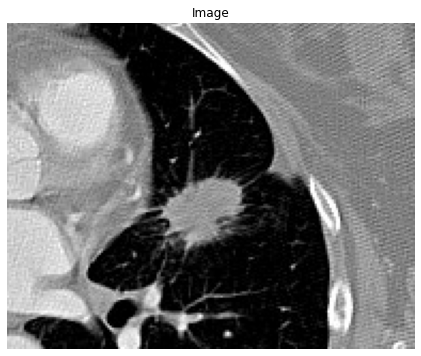

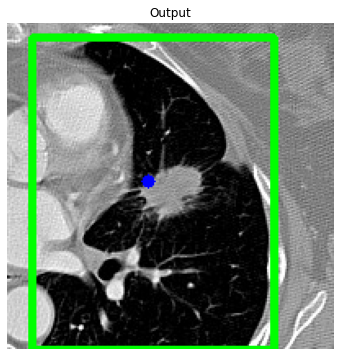

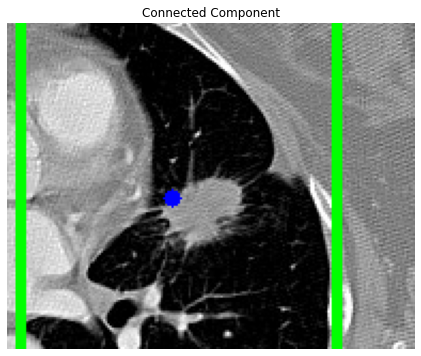

infor examining component 2/6


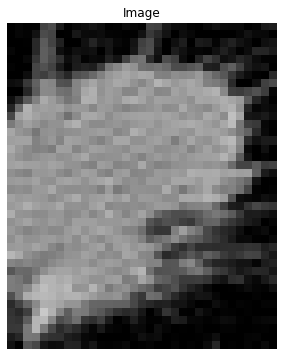

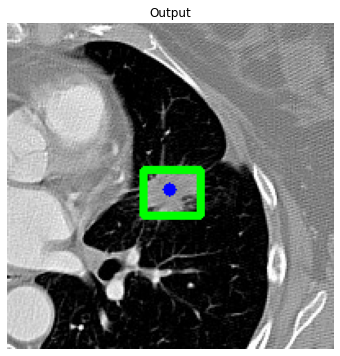

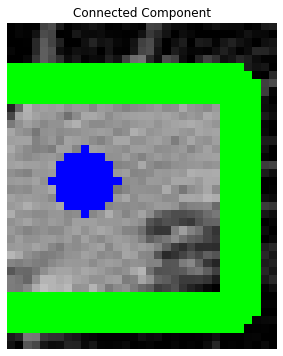

infor examining component 3/6


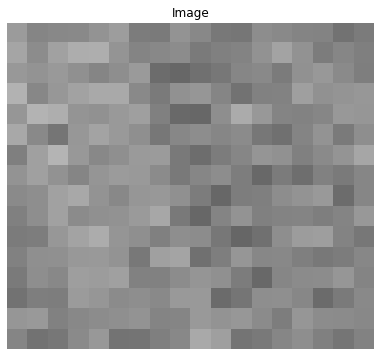

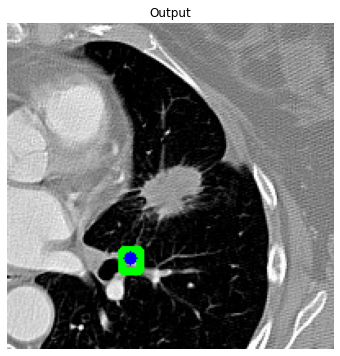

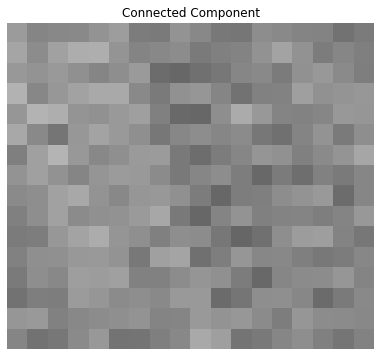

infor examining component 4/6


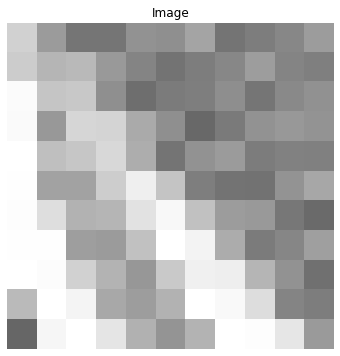

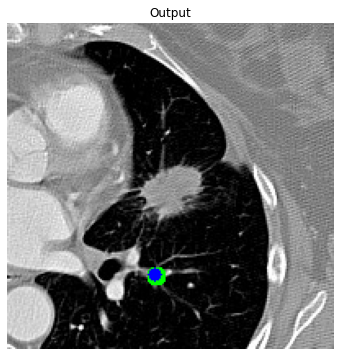

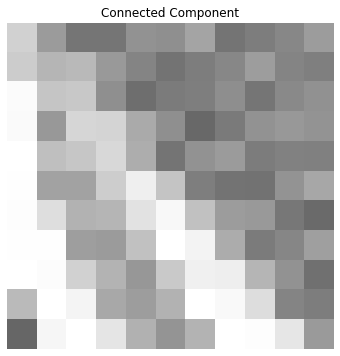

infor examining component 5/6


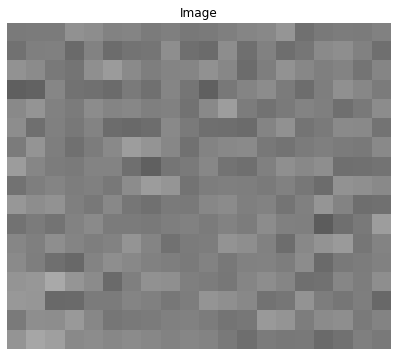

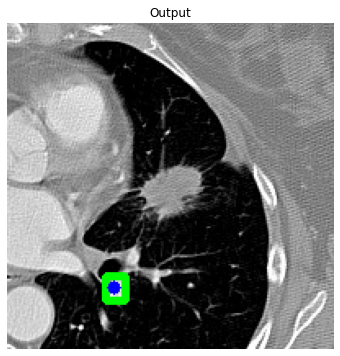

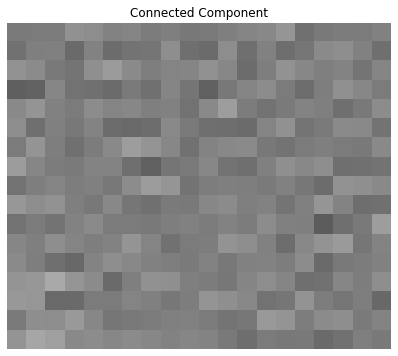

In [30]:
output = cv2.connectedComponentsWithStats(sobel, 4, cv2.CV_32S)

(numLabels, labels, stats, centroids) = output

for i in range(0,numLabels):
  
  if i is not 0:
    
    print('infor examining component {}/{}'.format(i,numLabels))
    x = stats[i,cv2.CC_STAT_LEFT]
    y = stats[i,cv2.CC_STAT_TOP]
    w = stats[i,cv2.CC_STAT_WIDTH]
    h = stats[i,cv2.CC_STAT_HEIGHT]
    area = stats[i,cv2.CC_STAT_AREA]
    (cX,cY) = centroids[i]
    result = tumor_picture.copy()

    image_slice = result[x:x + w+5,y:y + h+5]
    
    display_img(image_slice)
    cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.circle(result, (int(cX), int(cY)), 4, (0, 0, 255), -1)
    componentMask = (labels == i).astype("uint8") * 255
    display_img(result,title="Output")
    display_img(image_slice,title="Connected Component")
    
    